- 파라미터를 주고 그 중 일부만 실행
- random 에서 나온 best_param 를 기준 (+- 3~4)개로 **GridSearch** 실행함

--------

# 1. 환경준비

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2. 데이터 이해

In [52]:
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [53]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. 데이터 준비

#### 1) x,y 분리

In [54]:
target = 'medv'

x = data.drop(target,axis=1)
y = data[target]

print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### 2) 정규화

In [55]:
x = (x - x.min()) / (x.max() - x.min())

#### 3) train,test 분리

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2022)

# 4. 모델링

In [57]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [58]:
# 선언하기
model = KNeighborsRegressor(n_neighbors=5)

In [59]:
# 학습하기
model.fit(x_train,y_train)

KNeighborsRegressor()

In [60]:
# 예측하기
y_pred = model.predict(x_test)

In [61]:
# 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 3.0527631578947365
r2-score : 0.7860470863341451


In [62]:
# 파라미터 종류

model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# 5. 성능튜닝

#### Random Search

#### 1) 모델링 & 튜닝

In [63]:
# 파라미터 선언

param = {'n_neighbors' : range(1,51,1)}
param

{'n_neighbors': range(1, 51)}

In [64]:
# 불러오기

from sklearn.model_selection import RandomizedSearchCV

In [65]:
# 선언하기

model_knn = KNeighborsRegressor()

model = RandomizedSearchCV(model_knn,         # 기본 모델 이름
                           param,             # 파라미터 변수    
                           cv=10,             # k-fold cross validation (k)
                           n_iter=20,         # random하게 시도할 횟수
                           scoring='r2')      # 평가 방법

In [66]:
model.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 51)},
                   scoring='r2')

#### 2) 결과 확인

In [67]:
model.cv_results_

{'mean_fit_time': array([0.00348628, 0.00319672, 0.00268195, 0.00224774, 0.00236332,
        0.00286224, 0.00310841, 0.0035862 , 0.00317822, 0.00274007,
        0.00269275, 0.00282776, 0.00268977, 0.0030045 , 0.00391102,
        0.00371966, 0.00325253, 0.00270784, 0.00244536, 0.00258081]),
 'std_fit_time': array([0.00093285, 0.00037048, 0.00041282, 0.00035853, 0.00045055,
        0.00050534, 0.00068409, 0.00069618, 0.00164721, 0.00046877,
        0.00061238, 0.00042936, 0.00043602, 0.00089896, 0.00056657,
        0.00060733, 0.00038776, 0.00064774, 0.00060597, 0.00047725]),
 'mean_score_time': array([0.00277357, 0.00254662, 0.00236406, 0.00257404, 0.00260363,
        0.00281129, 0.00283377, 0.00329797, 0.00270331, 0.00265718,
        0.00269253, 0.00277863, 0.00269296, 0.00298524, 0.00353842,
        0.0030669 , 0.00315793, 0.00267985, 0.00265694, 0.00271065]),
 'std_score_time': array([6.01961463e-04, 6.05874536e-04, 5.57505356e-04, 4.45156922e-04,
        4.90517858e-04, 6.16124106e-

In [68]:
model.cv_results_['param_n_neighbors'].data

array([13, 20, 14, 21, 25, 16, 26, 18, 38, 31, 22, 17, 29, 41, 4, 10, 39,
       50, 19, 6], dtype=object)

In [69]:
# 20개의 평균 확인

model.cv_results_['mean_test_score']

array([0.59265431, 0.56114891, 0.58122107, 0.56125186, 0.55342179,
       0.57135504, 0.55001465, 0.56894534, 0.49450407, 0.52780538,
       0.55715091, 0.56533742, 0.54007307, 0.48088654, 0.67869753,
       0.59808653, 0.49012264, 0.43395936, 0.56520328, 0.60445655])

In [70]:
# 최적의 파라미터

model.best_params_

{'n_neighbors': 4}

In [71]:
# 최고의 성능

model.best_score_

0.6786975267065173

{'n_neighbors': 4}


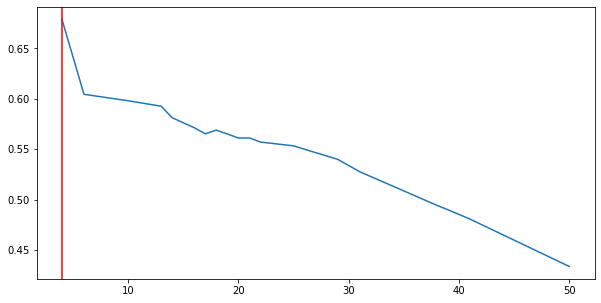

In [80]:
# 파라미터 시각화

tmp = pd.DataFrame()
tmp['neighbors'] = model.cv_results_['param_n_neighbors'].data
tmp['score'] = model.cv_results_['mean_test_score']

tmp.sort_values('neighbors', ascending=True, inplace=True)
print(model.best_params_)

plt.figure(figsize=(10,5))
plt.plot(tmp['neighbors'], tmp['score'])
plt.axvline(model.best_params_['n_neighbors'], color='r')
plt.show()

#### 3) 예측과 평가
 - 실전 평가와 비교

In [72]:
# 예측하기

y_pred = model.predict(x_test)

In [73]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2.792434210526315
r2-score : 0.8088599652727502
